<a href="https://colab.research.google.com/github/namk9010/TensorflowStudyExample/blob/master/ch05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ch5 Discrete Distributions**

pmf pdf https://www.researchgate.net/figure/The-pmf-and-cdf-of-u-o_fig1_319450178

cdf pdf https://jangjy.tistory.com/113

cdf ppf http://work.thaslwanter.at/Stats/html/statsDistributions.html

## **Binomial distribution**

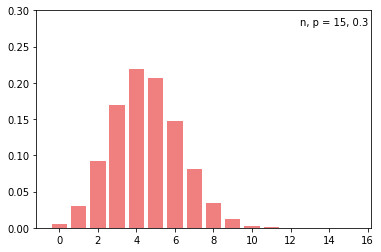

[4.74756151e-03 3.05200383e-02 9.15601148e-02 1.70040213e-01
 2.18623131e-01 2.06130381e-01 1.47235986e-01 8.11300333e-02
 3.47700143e-02 1.15900048e-02 2.98028694e-03 5.80575378e-04
 8.29393397e-05 8.20279183e-06 5.02211745e-07 1.43489070e-08]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Probability density of the binomial distribution
def bin_dist(k, n, p):
    nck = factorial(n) / (factorial(k) * factorial(n - k))
    pd = nck * p**k * (1-p)**(n-k)
    return pd


x = np.arange(16)
pd1 = np.array([bin_dist(k, 15, 0.3) for k in range(16)])
plt.ylim(0, 0.3)
plt.text(12.5, 0.28, 'n, p = 15, 0.3')
plt.bar(x, pd1, color='lightcoral')
plt.show()
print(pd1)

In [ ]:
n, p = 15, 0.3
s = np.random.binomial(n, p, 40)
print(s)

[2 3 4 3 8 3 6 4 3 5 5 3 5 4 2 5 5 4 3 6 3 7 6 4 6 4 2 1 5 6 2 2 3 6 1 1 5
 3 6 4]


In [ ]:
sum(np.random.binomial(15, 0.3, 20000) == 3)/20000.

0.1721

**scipy.stats.binom 이용**
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt

n, p = 20, 0.7
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
mean, var, skew, kurt

(array(14.), array(4.2), array(-0.19518001), array(-0.06190476))

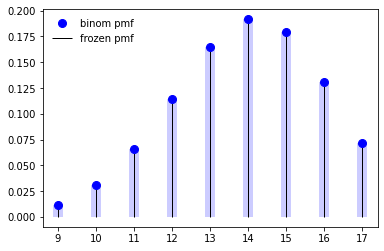

In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=10, alpha=0.2)

rv = binom(n, p)  # 파라미터가 고정된 binom object
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

In [ ]:
r = binom.rvs(n, p, size=40)
r

array([15, 14, 18, 17, 14, 13, 15, 17, 10, 14, 17, 14, 11, 16, 14, 17, 18,
       13, 15, 15, 16, 14, 13, 10, 16, 14, 13, 13, 16, 17, 15, 15, 16, 11,
       15, 14, 13, 13, 15, 13])

**Exercise 5.32 Fast Food and Gas Stations**

p=0.4, n=25

In [ ]:
n, p = 25, 0.4
mu = n*p
sigma = np.sqrt(n*p*(1-p))
mu, sigma

(10.0, 2.449489742783178)

In [ ]:
mu - 2*sigma, mu + 2*sigma

(5.101020514433644, 14.898979485566356)

In [ ]:
import math
math.ceil(mu - 2*sigma), math.floor(mu + 2*sigma)

(6, 14)

In [ ]:
# P(6 <= x <= 14) = P(x <= 14) - P(x <= 5)
binom.cdf(14, 25, 0.4) - binom.cdf(5, 25, 0.4)

0.9362462771170674

For any distribution - Tchebyshef theorem: at least 0.75

For mound-shaped distribution - Empirical rule: approximately 0.96

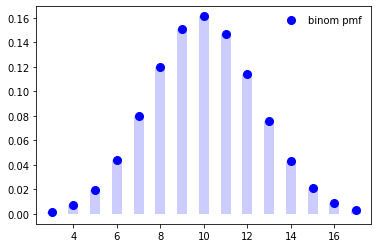

In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=10, alpha=0.2)

ax.legend(loc='best', frameon=False)
plt.show()

## **Poission distribution**

**scipy.stats.poisson 이용**
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [ ]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

mu = 2.5
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
mean, var, skew, kurt

(array(2.5), array(2.5), array(0.63245553), array(0.4))

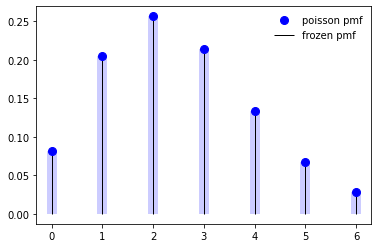

In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=10, alpha=0.2)

rv = poisson(mu)  # 파라미터가 고정된 poisson object
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
prob = poisson.cdf(x, mu)
np.allclose(x, poisson.ppf(prob, mu))

True

In [ ]:
r = poisson.rvs(mu, size=40)
r

array([2, 4, 1, 1, 5, 4, 0, 0, 1, 2, 0, 1, 3, 2, 6, 6, 3, 3, 4, 3, 2, 1,
       3, 1, 5, 2, 5, 0, 2, 3, 2, 1, 3, 2, 2, 4, 3, 4, 4, 3])

**Example 5.11**

In [ ]:
n=5000
p=0.001
x=4
px=binom.pmf(x, n, p)
px

0.17552002723394197

In [ ]:
mu=n*p
px=poisson.pmf(x, mu)
mu, px

(5.0, 0.17546736976785063)

**Exercise 5.43 Airport Safety**

$\mu=5$

In [ ]:
mu = 5
# a
poisson.pmf(0, mu)

0.006737946999085467

In [ ]:
# b
poisson.pmf(5, mu)

0.17546736976785068

In [ ]:
# c
1 - poisson.cdf(4, mu)

0.5595067149347874

## **Hytergeometric distribution**

**scipy.stats.hypergeom 이용**
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.htpergeom.html

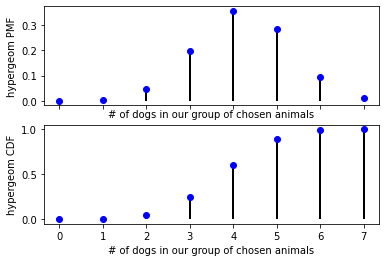

In [ ]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

[M, n, N] = [20, 7, 12]  # 모집단 크기, 모집단 내 성공 수, 표본 크기
rv = hypergeom(M, n, N)  # frozen rv
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, pmf_dogs, 'bo')
ax1.vlines(x, 0, pmf_dogs, lw=2)
ax1.set_xlabel('# of dogs in our group of chosen animals')
ax1.set_ylabel('hypergeom PMF')

prb = hypergeom.cdf(x, M, n, N)
ax2.plot(x, prb, 'bo')
ax2.vlines(x, 0, prb, lw=2)
ax2.set_xlabel('# of dogs in our group of chosen animals')
ax2.set_ylabel('hypergeom CDF')

plt.show()

In [ ]:
R = hypergeom.rvs(M, n, N, size=10)
R

array([5, 5, 6, 5, 5, 5, 6, 3, 5, 4])

**Exercise 5.56 Gender Bias?**

모집단 크기 M = 5

모집단 중 여자 n = 2

표본크기 N = 2

$p(k)=\frac{{n \choose k}{M-n \choose n-k}}{M \choose N}$

$\mu=N\frac{n}{M}$

$\sigma^2=N\frac{n}{M}\frac{M-n}{M}\frac{M-N}{M-1}$

In [ ]:
# b
[M, n, N] = [5, 2, 2]  # 모집단 크기, 모집단 내 성공 수, 표본 크기
mu = N*n/M
sigma2 = N*(n/M)*((M-n)/M)*((M-N)/(M-1))
mu, sigma2

(0.8, 0.36)

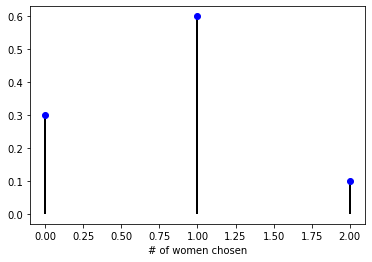

array([0.3, 0.6, 0.1])

In [ ]:
rv = hypergeom(M, n, N)  # frozen rv
fig, ax = plt.subplots(1, 1)
x = np.arange(0, n+1)
ax.plot(x, rv.pmf(x), 'bo')
ax.vlines(x, 0, rv.pmf(x), lw=2)
ax.set_xlabel('# of women chosen')
plt.show()
rv.pmf(x)